# HDip in Science in Data Analytics for Business (FT) Statistical Techniques
   ## - Nuno Alfredo Ribeiro Teixeira de Almeida - 2021310

### Import Libraries 

Data set from : https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


sns.set(color_codes=True) 

In [2]:
bank = pd.read_csv("BankChurners.csv") 

### Understanding Variables

#### About Customer:

- CLIENTNUM: unique client number value each customer
- Attrition_Flag: Internal event (customer activity) variable ("Existing Customer","Attrited Customer")
- Customer_Age: Demographic variable - Customer's Age in Years
- Gender: Demographic variable - M=Male, F=Female
- Dependent_count: Demographic variable - Number of dependents
- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
- Income_Category: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, >


#### About Credit Card:

- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count:Total no. of products held by the customer.
- Months_Inactive_12_mon:No. of Months in the last 12 months.
- Contacts_Count_12_mon:No. of Contacts in the last 12 months.
- Credit_Limit:Credit Limit on the Credit Card
- Total_Revolving_Bal:Total Revolving Balance on the Credit Card.
- Avg_Open_To_Buy:Open to Buy Credit Line (Average of last 12 months
- Total_Amt_Chng_Q4_Q1:Change in Transaction Amount (Q4 over Q1).
- Total_Trans_Amt:Total Transaction Amount (Last 12 months).
- Total_Trans_Ct:Total Transaction Count (Last 12 months).
- Total_Ct_Chng_Q4_Q1:Change in Transaction Count (Q4 over Q1).
- Avg_Utilization_Ratio:Average Card Utilization Ratio.

### Size

In [3]:
print('Number of rows in the data = {}'.format(bank.shape[0]))
print('Number of Columns in the data = {}'.format(bank.shape[1]))
bank.head()

Number of rows in the data = 10127
Number of Columns in the data = 23


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

### Columns data
Name of colummns in the dataset using function ( data.columns )

In [4]:
bank.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
bank

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

#### Describing Data 
Understanding the Dtypes of the dataset using the function ( data.dtypes )

In [6]:
bank.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

More informations about the dataset using the function ( data.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

### The 5 number summary 


In [8]:
bank.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count         10127.000000           10127.000000   
mean              0.712222               0.274894   
std               0.238086               0.275691   
min               0.000000               0.000000   
25%               0.582000               0.023000   
50%               0.702000               0.176000   
75%               0.818000               0.503000   
max               3.714000               0.999000   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
count                                       10127.000000                                                                                    
mean                                            0.159997                                                                                    
std                                             0.365301                                                                                    
min                                             0.000008                                                                                    
25%                                             0.000099                                                                                    
50%                                             0.000181                                                                                    
75%                                             

In [9]:
bank.describe(include=object)

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

The client number and naive Bayes is not relevant data for works as we are doing in this CA2, then I will remove then with the function ( data.drop( )).

In [10]:
bank.drop(['Total_Ct_Chng_Q4_Q1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
           'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
          axis = 1, inplace = True)

bank.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                 1.335             1144              42   
1                 1.541             1291              33   
2                 2.594             1887              20   
3                 1.405             1171              20   
4                 2.175              816              28   

   Avg_Utilization_Ratio  
0                  0.061  
1                  0.105  
2                  0.000  
3                  0.760  
4                  0.000

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Using Missing values function

In [12]:
print('Number of missing values by column:')
bank.isna().sum()

Number of missing values by column:


CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [13]:
bank.rename(columns = {'CLIENTNUM': 'Cliente ID','Attrition_Flag': 'Customer', 'Customer_Age': 'Age','Dependent_count':'Dependents' , 'Education_Level' : 'Education', 'Marital_Status':'Status'}, inplace = True)


### Understanding Unknown Values 

In [14]:
bank['Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In some of features, there are a values that are classified "Unknown". Working within the data that we have values we will identify and remove then. 

In [15]:
bank.apply(lambda x: sum(x=='Unknown') / len(bank))

Cliente ID                  0.000000
Customer                    0.000000
Age                         0.000000
Gender                      0.000000
Dependents                  0.000000
Education                   0.149995
Status                      0.073961
Income_Category             0.109805
Card_Category               0.000000
Months_on_book              0.000000
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      0.000000
Contacts_Count_12_mon       0.000000
Credit_Limit                0.000000
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             0.000000
Total_Amt_Chng_Q4_Q1        0.000000
Total_Trans_Amt             0.000000
Total_Trans_Ct              0.000000
Avg_Utilization_Ratio       0.000000
dtype: float64

As we will work with category that unknow values are in. We will remove then to not change the results as our studies. 

#### Using the function df.mask from Pandas Libraries

Libraries  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html

Replace values where the condition is True and associating this function with the function dropna for working and location where are theses values from the dataset and change all of them. 

In [16]:
bank = bank.mask(bank.eq('Unknown')).dropna()

### Checking Duplicated values 

In [17]:
bank.duplicated().any()

False

### Checking Null Values

In [18]:
bank.isnull().any()

Cliente ID                  False
Customer                    False
Age                         False
Gender                      False
Dependents                  False
Education                   False
Status                      False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Avg_Utilization_Ratio       False
dtype: bool

### Checking Outliers

<AxesSubplot:xlabel='Credit_Limit'>

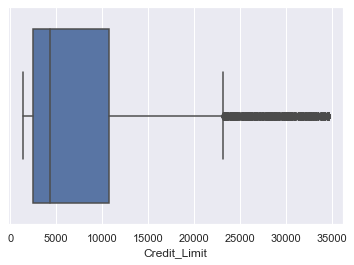

In [19]:
import seaborn as sns
sns.boxplot(x=bank['Credit_Limit'])

<AxesSubplot:xlabel='Months_Inactive_12_mon'>

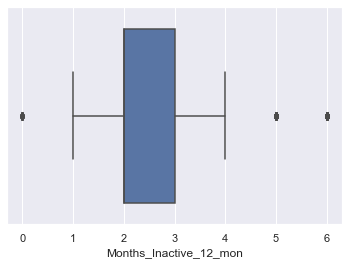

In [20]:
sns.boxplot(x=bank['Months_Inactive_12_mon'])

<AxesSubplot:>

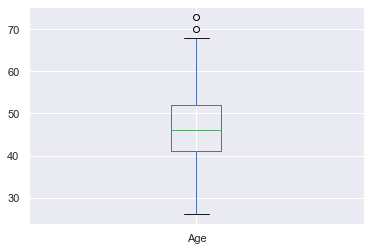

In [21]:
bank["Age"].plot.box()

<AxesSubplot:>

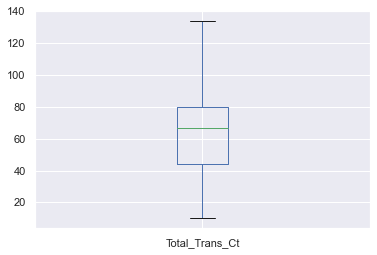

In [22]:
bank["Total_Trans_Ct"].plot.box()

### Featuring Engineering with Income_Category

In [23]:
bank['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

https://stackoverflow.com/questions/27060098/replacing-few-values-in-a-pandas-dataframe-column-with-another-value

Replace the categories with labels which describes the level of income and  Display the counts of the the new income labels

In [24]:

income_categories_labels = {'Less than $40K' : 'low', '$40K - $60K' : 'medium',
                            '$60K - $80K': 'above medium', '$80K - $120K':'high', '$120K +' : 'very high'}
bank['Income_Category'] = bank['Income_Category'].replace(income_categories_labels)

bank['Income_Category'].value_counts()

low             2792
medium          1412
high            1202
above medium    1103
very high        572
Name: Income_Category, dtype: int64

In [25]:
bank['Credit_Limit'].tolist()

[12691.0,
 8256.0,
 3418.0,
 4716.0,
 4010.0,
 22352.0,
 11656.0,
 11751.0,
 2436.0,
 30367.0,
 3193.0,
 20979.0,
 1438.3,
 4470.0,
 7768.0,
 4785.0,
 2451.0,
 8923.0,
 2650.0,
 12555.0,
 3520.0,
 3035.0,
 15433.0,
 32426.0,
 17304.0,
 3906.0,
 34516.0,
 2283.0,
 2548.0,
 19458.0,
 4745.0,
 1438.3,
 3171.0,
 15769.0,
 2802.0,
 4458.0,
 3336.0,
 34516.0,
 5926.0,
 23957.0,
 14734.0,
 34516.0,
 6584.0,
 2084.0,
 1687.0,
 25300.0,
 34516.0,
 2216.0,
 22913.0,
 24312.0,
 5272.0,
 7000.0,
 7038.0,
 2536.0,
 28904.0,
 8567.0,
 34516.0,
 3085.0,
 19040.0,
 4026.0,
 12756.0,
 9930.0,
 31302.0,
 6576.0,
 2664.0,
 1709.0,
 3454.0,
 3789.0,
 9689.0,
 2940.0,
 3031.0,
 8358.0,
 34516.0,
 14450.0,
 8466.0,
 3263.0,
 1494.0,
 13551.0,
 18886.0,
 9964.0,
 24159.0,
 5362.0,
 34516.0,
 3174.0,
 12262.0,
 3788.0,
 34516.0,
 2926.0,
 32090.0,
 11669.0,
 13532.0,
 2393.0,
 19270.0,
 3710.0,
 3235.0,
 11749.0,
 7753.0,
 10408.0,
 6205.0,
 8025.0,
 14926.0,
 6335.0,
 14979.0,
 2732.0,
 2250.0,
 10916.0,
 93

## Divide values into Categorical and Numerical

REASON

In [26]:
bank.columns

Index(['Cliente ID', 'Customer', 'Age', 'Gender', 'Dependents', 'Education',
       'Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')

In [27]:
df_categorical = bank.loc[:,bank.dtypes == np.object]
print('Categorical Columns are : {}'.format(df_categorical.columns))

Categorical Columns are : Index(['Customer', 'Gender', 'Education', 'Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


### Categorical Data

- Customer
- Gender
- Education
- Status
- Income_Category
- Card_Category

In [28]:
df_numerical = bank.loc[:,bank.dtypes != np.object]
print('Numerical Columns are : {}'.format(df_numerical.columns))

Numerical Columns are : Index(['Cliente ID', 'Age', 'Dependents', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')


### Numerical Data 

- Age
- Dependents
- Months_on_book
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon
- Credit_Limit
- Total_Revolving_Bal
- Avg_Open_To_Buy
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1
- Avg_Utilization_Ratio

## ANALYSING OUTLIERS 

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

#### Using Interpolate mode to detect outliers

In [29]:
Q1 = bank.quantile(0.25) 
Q3 = bank.quantile(0.75) 
IQR = Q3 - Q1 
print(IQR)

Cliente ID                  6.022650e+07
Age                         1.100000e+01
Dependents                  2.000000e+00
Months_on_book              9.000000e+00
Total_Relationship_Count    2.000000e+00
Months_Inactive_12_mon      1.000000e+00
Contacts_Count_12_mon       1.000000e+00
Credit_Limit                8.231000e+03
Total_Revolving_Bal         1.318000e+03
Avg_Open_To_Buy             8.243000e+03
Total_Amt_Chng_Q4_Q1        2.290000e-01
Total_Trans_Amt             2.651000e+03
Total_Trans_Ct              3.600000e+01
Avg_Utilization_Ratio       4.890000e-01
dtype: float64


In [30]:
bankinter = bank[~((bank< (Q1-1.5 * IQR)) |(bank > (Q3 + 1.5 * IQR))).any(axis=1)] 
bankinter.shape

(4885, 20)

In [31]:
bank.shape

(7081, 20)

#### Using ZScores mode to remove outliers from Numerical Data. 

In [32]:
df_numerical = bank.loc[:,bank.dtypes != np.object]

In [33]:
df_numerical.dtypes

Cliente ID                    int64
Age                           int64
Dependents                    int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Avg_Utilization_Ratio       float64
dtype: object

In [34]:
from scipy import stats
import numpy as np

for column in df_numerical : 
    z = np.abs(stats.zscore(bank[column]))
    bankstats = bank[(z <= 3)]
print(bankstats.shape)

(7081, 20)


https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [35]:
print('After Z-score cleaning {} rows for anlysis'.format(bank.shape[0]))
print('After Quantile cleaning {} rows for anlysis'.format(bankinter.shape[0]))
print('After cleaning {} columns for anlysis'.format(bank.shape[1]))

After Z-score cleaning 7081 rows for anlysis
After Quantile cleaning 4885 rows for anlysis
After cleaning 20 columns for anlysis


## Exploratory Data Analysis (EDA)

#### Relation Between Variables 

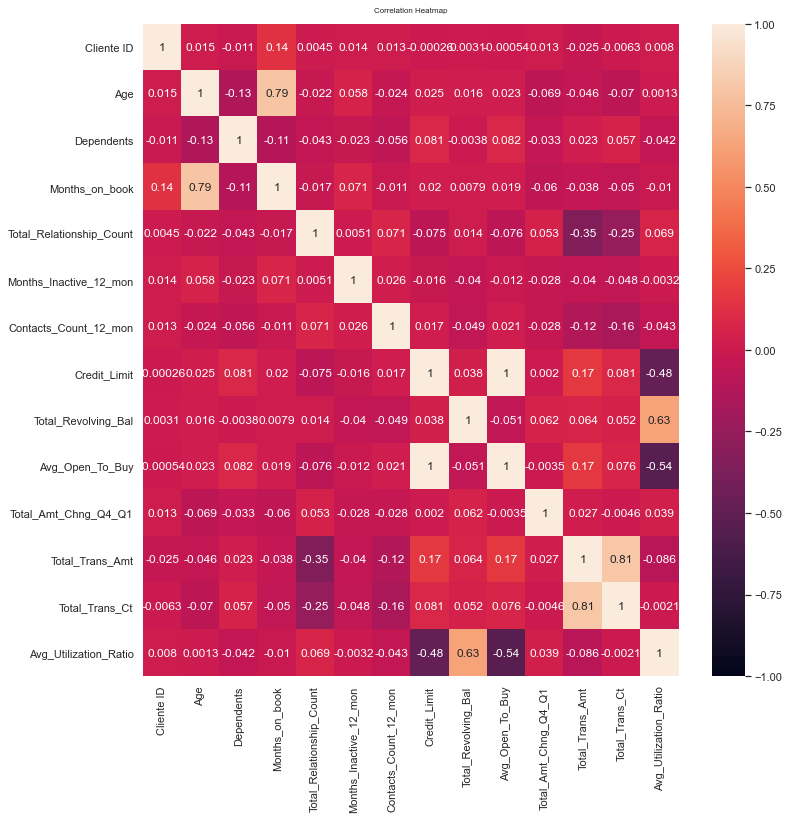

In [36]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(bank.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12);

##### From the heatmap,it can be seen that the columns 'Avg_Open_To_Buy' and 'Credit_Limit','Total_Revolving_Bal' and 'Avg_Utilization_Ratio', 'Months_on_book' and 'Customer_Age'are highly correlated(value of 1).

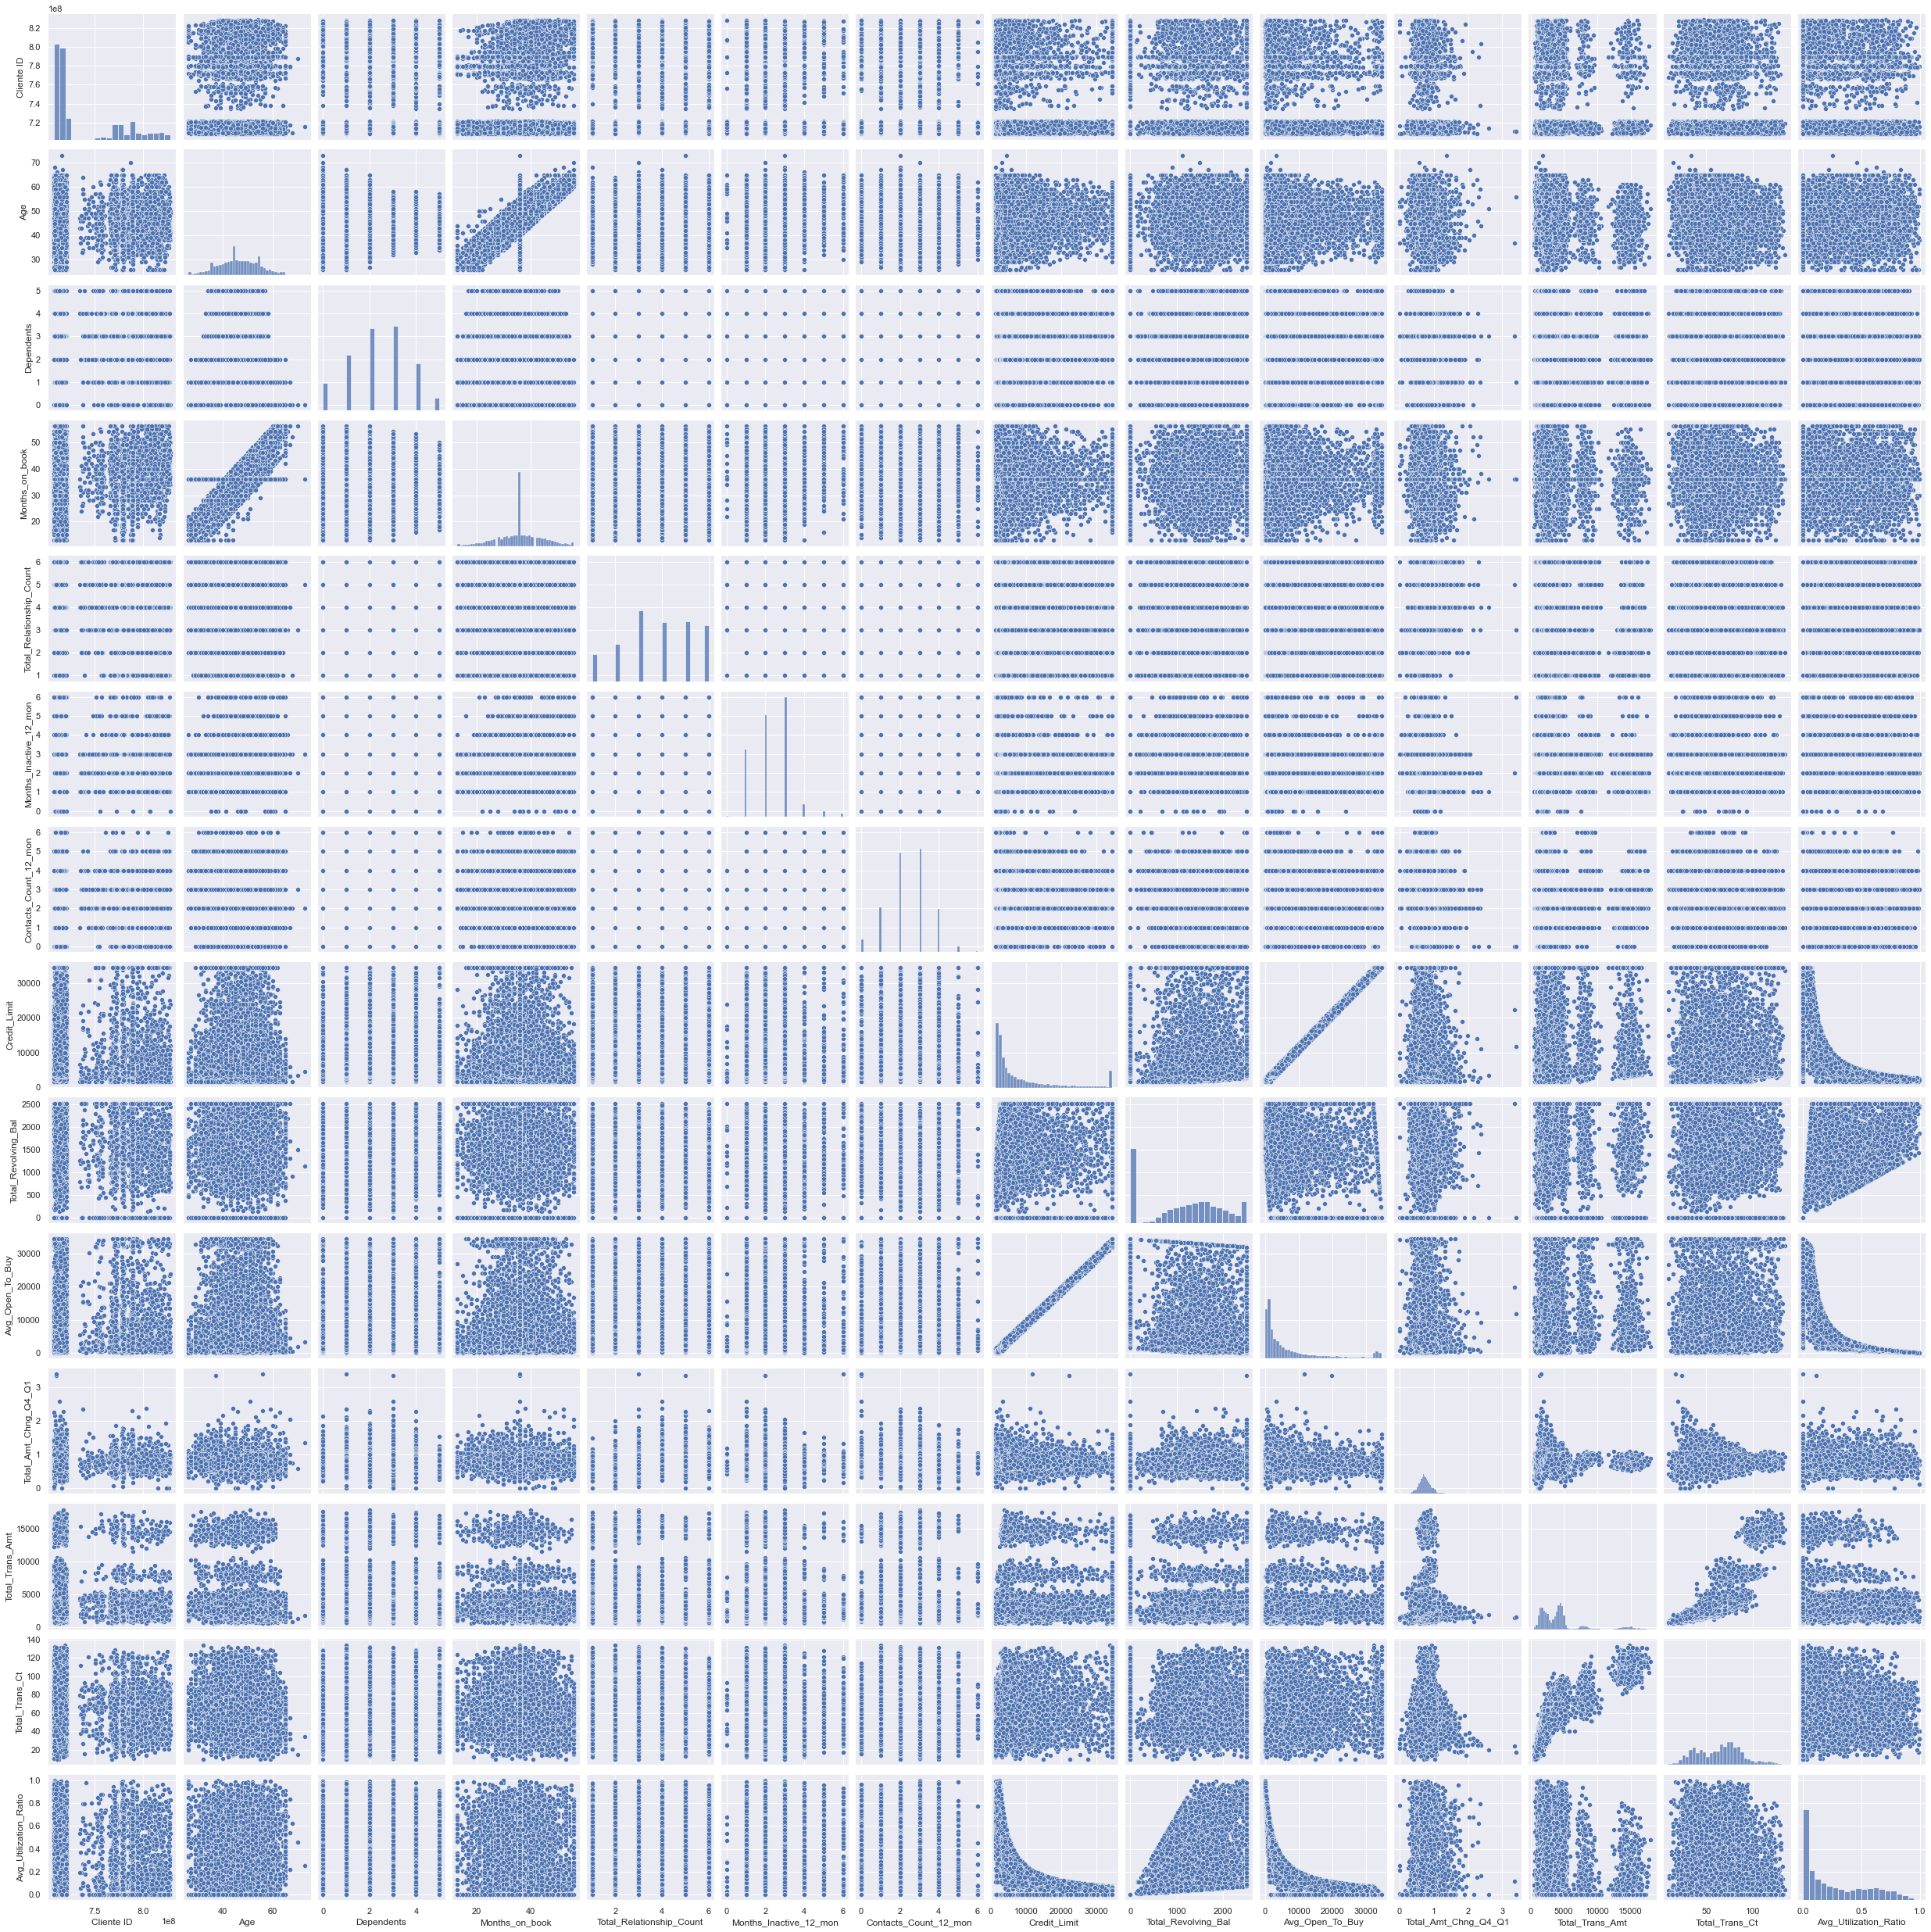

In [37]:
sns.pairplot(df_numerical) 
plt.show()

The next graphs show us the Ditribuition of Count Variables from the Data Set. We can define as a Numerical Data.

In [38]:
def plot_hist(df,variable):
    var = df[variable]
    plt.figure(figsize = (9,3))
    sns.histplot(var,bins = 50,kde=True)
    plt.ylabel("Count")
    plt.xlabel(variable)
    plt.title("{} Distribituon".format(variable))
    plt.show()

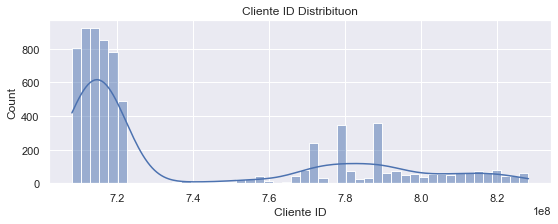

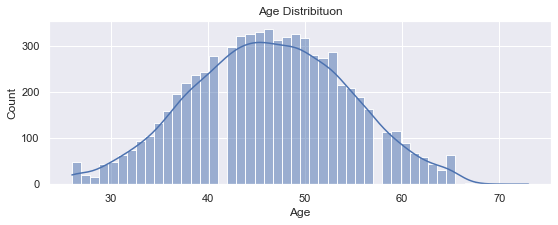

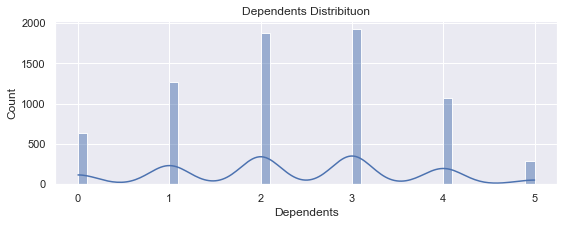

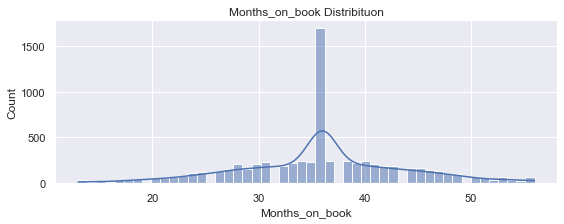

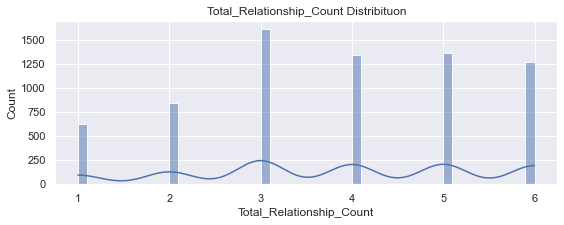

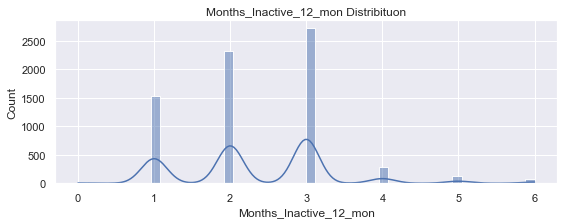

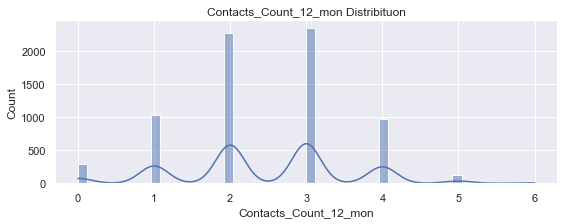

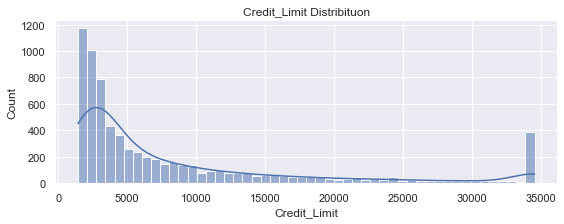

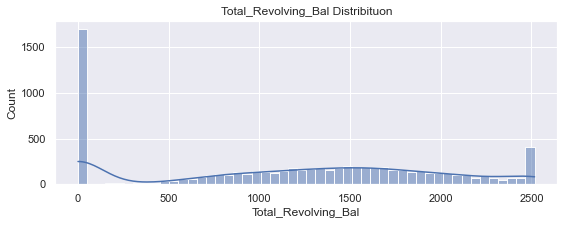

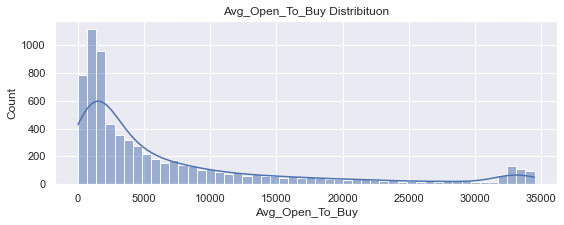

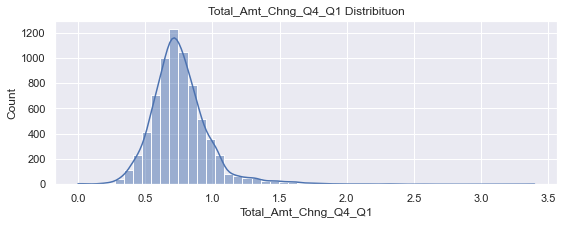

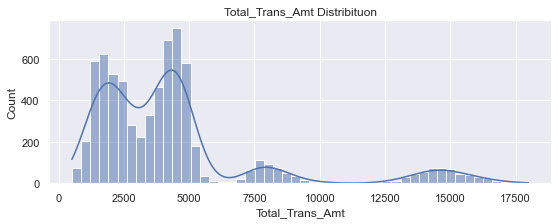

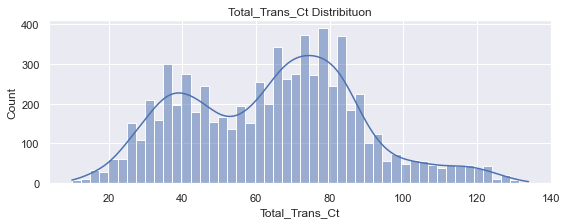

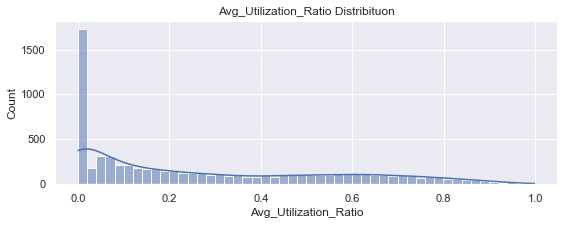

In [39]:
for var in df_numerical:
    plot_hist(bank,var)

#### Distribuition

<AxesSubplot:xlabel='Gender', ylabel='Credit_Limit'>

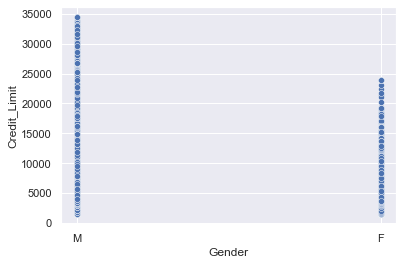

In [40]:
sns.scatterplot(data=bank, x="Gender", y="Credit_Limit")

<AxesSubplot:xlabel='Credit_Limit', ylabel='Income_Category'>

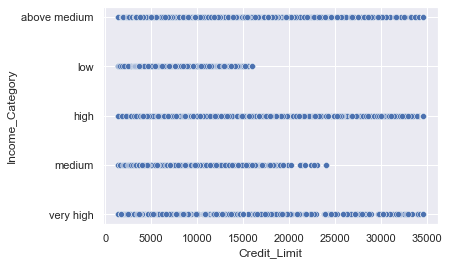

In [41]:
sns.scatterplot(data=bank, x="Credit_Limit", y="Income_Category")

# First section (30 marks)
# Choose one variable and perform a Hypothesis Test based on the data and interpret your results providing 
a conclusion and your own analysis. You will need to conduct research to find the parameters of the 
population you want to analyse. 
Some examples: 

✓ It is believed that the average age to finish High School is 17 years old, then you perform a HT to 
reject or not this hypothesis.
✓ It is believed that due to COVID and remote working workers save 8.5hours on average, then you 
perform a HT to reject or not this hypothesis.



hYPOTHESE: The Avarege of women can be 4.000 and our performance can mensure if 

In [42]:
bank

Cliente ID           Customer  Age Gender  Dependents    Education  \
0       768805383  Existing Customer   45      M           3  High School   
1       818770008  Existing Customer   49      F           5     Graduate   
2       713982108  Existing Customer   51      M           3     Graduate   
4       709106358  Existing Customer   40      M           3   Uneducated   
5       713061558  Existing Customer   44      M           2     Graduate   
...           ...                ...  ...    ...         ...          ...   
10120   710841183  Existing Customer   54      M           1  High School   
10121   713899383  Existing Customer   56      F           1     Graduate   
10122   772366833  Existing Customer   50      M           2     Graduate   
10124   716506083  Attrited Customer   44      F           1  High School   
10126   714337233  Attrited Customer   43      F           2     Graduate   

        Status Income_Category Card_Category  Months_on_book  \
0      Married    above medium          Blue              39   
1       Single             low          Blue              44   
2      Married            high          Blue              36   
4      Married    above medium          Blue              21   
5      Married          medium          Blue              36   
...        ...             ...           ...             ...   
10120   Single    above medium          Blue              34   
10121   Single             low          Blue              50   
10122   Single          medium          Blue              40   
10124  Married             low          Blue              36   
10126  Married             low        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
4                             5                       1   
5                             3                       1   
...                         ...                     ...   
10120                         5                       2   
10121                         4                       1   
10122                         3                       2   
10124                         5                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
4                          0        4716.0                    0   
5                          2        4010.0                 1247   
...                      ...           ...                  ...   
10120                      0       13940.0                 2109   
10121                      4        3688.0                  606   
10122                      3        4003.0                 1851   
10124                      4        5409.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
4               4716.0                 2.175              816              28   
5               2763.0                 1.376             1088              24   
...                ...                   ...              ...             ...   
10120          11831.0                 0.660            15577             114   
10121           3082.0                 0.570            14596             120   
10122           2152.0                 0.703            15476         

##### To deepen our analysis to understand the variables chosen for the first section, we will highlight the Data Set and its Gender variable (Male and Female). Understanding the purchasing power of women, we can analyze the measures.

#### Understanding and Reducing my entire Data set in a Sample 

In [43]:
pml =display( "Percentual Frequency of male and female:" , bank["Gender"].value_counts(dropna=False, normalize=True)*100)

'Percentual Frequency of male and female:'

M    52.337241
F    47.662759
Name: Gender, dtype: float64

In [44]:
display( "Mode between male and female:" ,bank["Gender"].mode())

'Mode between male and female:'

0    M
dtype: object

In [45]:
bank

Cliente ID           Customer  Age Gender  Dependents    Education  \
0       768805383  Existing Customer   45      M           3  High School   
1       818770008  Existing Customer   49      F           5     Graduate   
2       713982108  Existing Customer   51      M           3     Graduate   
4       709106358  Existing Customer   40      M           3   Uneducated   
5       713061558  Existing Customer   44      M           2     Graduate   
...           ...                ...  ...    ...         ...          ...   
10120   710841183  Existing Customer   54      M           1  High School   
10121   713899383  Existing Customer   56      F           1     Graduate   
10122   772366833  Existing Customer   50      M           2     Graduate   
10124   716506083  Attrited Customer   44      F           1  High School   
10126   714337233  Attrited Customer   43      F           2     Graduate   

        Status Income_Category Card_Category  Months_on_book  \
0      Married    above medium          Blue              39   
1       Single             low          Blue              44   
2      Married            high          Blue              36   
4      Married    above medium          Blue              21   
5      Married          medium          Blue              36   
...        ...             ...           ...             ...   
10120   Single    above medium          Blue              34   
10121   Single             low          Blue              50   
10122   Single          medium          Blue              40   
10124  Married             low          Blue              36   
10126  Married             low        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
4                             5                       1   
5                             3                       1   
...                         ...                     ...   
10120                         5                       2   
10121                         4                       1   
10122                         3                       2   
10124                         5                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
4                          0        4716.0                    0   
5                          2        4010.0                 1247   
...                      ...           ...                  ...   
10120                      0       13940.0                 2109   
10121                      4        3688.0                  606   
10122                      3        4003.0                 1851   
10124                      4        5409.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
4               4716.0                 2.175              816              28   
5               2763.0                 1.376             1088              24   
...                ...                   ...              ...             ...   
10120          11831.0                 0.660            15577             114   
10121           3082.0                 0.570            14596             120   
10122           2152.0                 0.703            15476         

In [46]:
bank['Credit_Limit'].describe()

count     7081.000000
mean      8492.773831
std       9126.072520
min       1438.300000
25%       2498.000000
50%       4287.000000
75%      10729.000000
max      34516.000000
Name: Credit_Limit, dtype: float64

### Types of Test 

### ANOVA


https://towardsdatascience.com/analysis-of-variance-and-its-variations-6ef3f8fbeb05
As I said above the 1-way Anova can only account for a single independent and dependent variable. There are extensions of the 1-way Anova that allow us to circumvent these limitations. The first is the 2-way Anova. This test still requires us to have only 1 dependent variable, however we are able to include multiple independent variables to analyze the variance between groups.

###### I am using the extra example to show another way to separate the Dataset in a sample to evaluate and use in Statistical or other modes to predict. This data set was already split as a sample when I decided to develop this section with the female gender. 

### Using a Sample to show the graphcs

###### The next function illustrate using 'Client_ID' as a list to identify all the results from the sample

In [47]:
uniqueclient = list(bank['Cliente ID'].unique())

In [48]:
import random

###### Using next function to get a sample from the Data set and operating a analysis about it.

https://appdividend.com/2020/06/23/python-random-sample-function-example/

In [49]:
random.seed(30)

In [50]:
sampleclient = random.sample(uniqueclient, 1000)

In [51]:
sample_df = bank[bank['Cliente ID'].isin(sampleclient)].reset_index(drop=True)


In [52]:
sample_df = sample_df[['Income_Category', 'Credit_Limit']]

In [53]:
groups = sample_df.groupby('Income_Category').count().reset_index()

###### Depend of the size of sample you got, this next table will show the results acording the variables that you are studying. In that example we used "Income Category" and "Credit_Limit" :

In [54]:
groups

Income_Category  Credit_Limit
0    above medium           160
1            high           165
2             low           409
3          medium           192
4       very high            74

EDITAR :  
    
    
referencias para os proximos gráficos. 
https://towardsdatascience.com/hypothesis-testing-in-real-life-47f42420b1f7

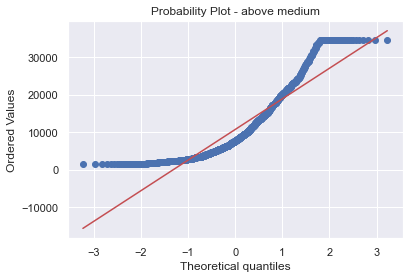

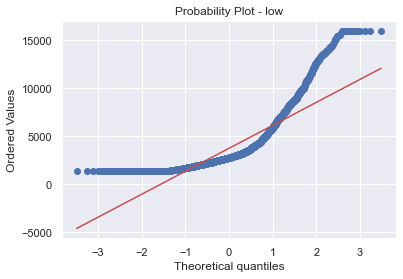

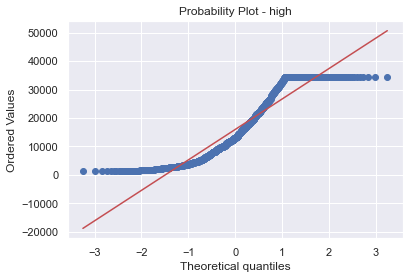

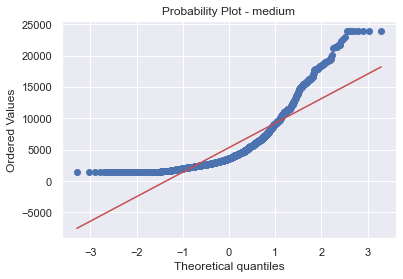

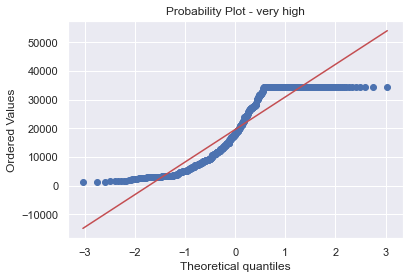

In [55]:

import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_Category = bank['Income_Category'].unique()
for category in unique_Category:
    stats.probplot(bank[bank['Income_Category'] == category]['Credit_Limit'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  category)
    plt.show()

#### About Customer:

- CLIENTNUM: unique clinet number value each customer
- Attrition_Flag: Internal event (customer activity) variable ("Existing Customer","Attrited Customer")
- Customer_Age: Demographic variable - Customer's Age in Years
- Gender: Demographic variable - M=Male, F=Female
- Dependent_count: Demographic variable - Number of dependents
- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
- Income_Category: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, >


#### About Credit Card:

- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count:Total no. of products held by the customer.
- Months_Inactive_12_mon:No. of Months in the last 12 months.
- Contacts_Count_12_mon:No. of Contacts in the last 12 months.
- Credit_Limit:Credit Limit on the Credit Card
- Total_Revolving_Bal:Total Revolving Balance on the Credit Card.
- Avg_Open_To_Buy:Open to Buy Credit Line (Average of last 12 months
- Total_Amt_Chng_Q4_Q1:Change in Transaction Amount (Q4 over Q1).
- Total_Trans_Amt:Total Transaction Amount (Last 12 months).
- Total_Trans_Ct:Total Transaction Count (Last 12 months).
- Total_Ct_Chng_Q4_Q1:Change in Transaction Count (Q4 over Q1).
- Avg_Utilization_Ratio:Average Card Utilization Ratio.

## Using Chi-square test 

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [56]:

contingency_table =pd.crosstab(bank["Income_Category"],bank["Gender"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 Gender              F     M
Income_Category            
above medium        0  1103
high                0  1202
low              2573   219
medium            802   610
very high           0   572


percentual

https://medium.com/swlh/how-to-run-chi-square-test-in-python-4e9f5d10249d

In [57]:
contigency_pct = pd.crosstab(bank['Income_Category'], bank['Gender'], normalize='columns')
contigency_pct

Gender                 F         M
Income_Category                   
above medium     0.00000  0.297625
high             0.00000  0.324339
low              0.76237  0.059093
medium           0.23763  0.164598
very high        0.00000  0.154344

<AxesSubplot:xlabel='Gender', ylabel='Income_Category'>

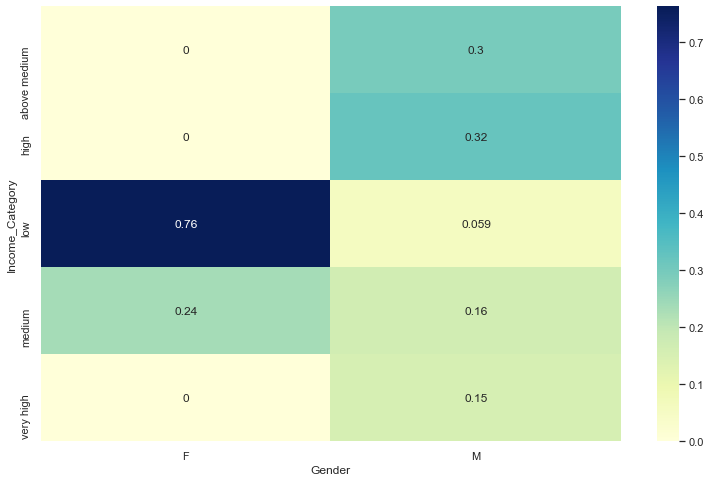

In [58]:
plt.figure(figsize=(13,8)) 
sns.heatmap(contigency_pct, annot=True, cmap="YlGnBu")

In [59]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingency_table) 
# Print the p-value
print(p)

0.0


In [60]:

#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)




Observed Values :-
 [[   0 1103]
 [   0 1202]
 [2573  219]
 [ 802  610]
 [   0  572]]
Expected Values :-
 [[ 525.72023725  577.27976275]
 [ 572.90636916  629.09363084]
 [1330.74424516 1461.25575484]
 [ 672.9981641   739.0018359 ]
 [ 272.63098432  299.36901568]]


In [61]:
no_of_rows=len(contingency_table.iloc[0:2,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [62]:

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)


chi-square statistic:- 4883.016920248163
critical_value: 3.841458820694124


In [63]:

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 4883.016920248163
critical_value: 3.841458820694124
p-value: 0.0


In [64]:

if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


## Using Z-test to understand the value absolut about the Null Hypothesys.

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [65]:
mean= bank['Credit_Limit'].mean()

print('The mean is {:.2f}'.format(mean))

The mean is 8492.77


In [66]:
std = bank['Credit_Limit'].std()

print('The standart deviation is {:.2f}'.format(std))

The standart deviation is 9126.07


SEPARAÇÃO EM GRUPOS UMA COLUNA EM ESPECIFICO. Masculino e Feminino 
https://www.delftstack.com/pt/howto/python-pandas/split-pandas-dataframe/#dividir-dataframe-utilizando-o-groupby-m%25C3%25A9todo

In [67]:

groups = bank.groupby(bank.Gender)
m_df = groups.get_group("M")
f_df=groups.get_group("F")


In [68]:
print("Group Male:")
print(m_df,"\n")

print("Group Female:")
print(f_df,"\n")


Group Male:
       Cliente ID           Customer  Age Gender  Dependents    Education  \
0       768805383  Existing Customer   45      M           3  High School   
2       713982108  Existing Customer   51      M           3     Graduate   
4       709106358  Existing Customer   40      M           3   Uneducated   
5       713061558  Existing Customer   44      M           2     Graduate   
8       710930508  Existing Customer   37      M           3   Uneducated   
...           ...                ...  ...    ...         ...          ...   
10115   712210458  Existing Customer   38      M           1   Uneducated   
10116   714109308  Existing Customer   46      M           5      College   
10117   712503408  Existing Customer   57      M           2     Graduate   
10120   710841183  Existing Customer   54      M           1  High School   
10122   772366833  Existing Customer   50      M           2     Graduate   

        Status Income_Category Card_Category  Months_on_book  \

[3375 rows x 20 columns] 



In [69]:
meanf = f_df['Credit_Limit'].mean()

print('The mean is {:.2f}'.format(meanf ))

The mean is 3936.54


In [70]:
meanm = m_df['Credit_Limit'].mean()

print('The mean is {:.2f}'.format(meanm))

The mean is 12642.07


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [71]:
round(bank.groupby('Gender')['Credit_Limit'].mean().sort_values(ascending=False).iloc[:10],1)

Gender
M    12642.1
F     3936.5
Name: Credit_Limit, dtype: float64

In [72]:
stdf = f_df['Credit_Limit'].std()

print('The standart deviation is {:.2f}'.format(stdf))

The standart deviation is 3163.39


In [73]:
stdm = m_df['Credit_Limit'].std()

print('The standart deviation is {:.2f}'.format(stdm))

The standart deviation is 10672.76


In [74]:
round(bank.groupby('Income_Category')['Credit_Limit'].mean().sort_values(ascending=False).iloc[:10],1)

Income_Category
very high       19547.2
high            15956.2
above medium    10685.2
medium           5333.9
low              3746.4
Name: Credit_Limit, dtype: float64

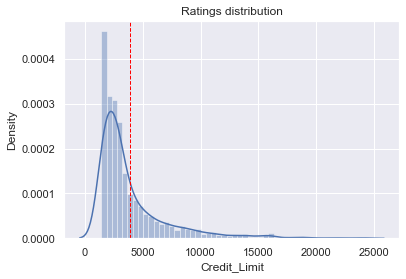

In [75]:
sns.distplot(f_df['Credit_Limit'])
plt.axvline(f_df['Credit_Limit'].values.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Ratings distribution');

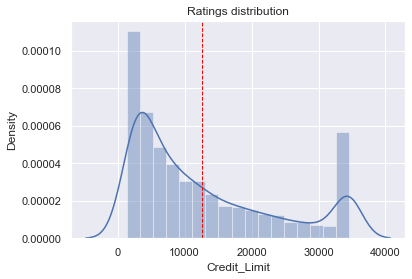

In [76]:
sns.distplot(m_df['Credit_Limit'])
plt.axvline(m_df['Credit_Limit'].values.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title('Ratings distribution');

## the average of Credit Limit in the female is above 4.000. 
The Null Hypotheses is average is 4.000
The Alternative Hypothesys is  H0 < 4.000 < H0


In [77]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(f_df['Credit_Limit'], x2=None, value=4000)
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.24386291566745577
accept null hypothesis


# Second section (30 marks)
Carry out a correlation analysis between 2 variables. Interpret your results and check if the correlation 
implies causation. Provide a short explanation and conclusion based on your findings.

One of the variables visible for purchase through the Credit Limit directly isOpen to Buy Credit Line, but analysing the influence with another variable, would be the relationship time with the bank. Variables as well as Age and Months on Book are temporal variables that, over time, build solid bases with the bank, and can influence positively or negatively. Analysing the entire sample audience and the data set showing the audience without gender distinction.

#### About Customer:

- CLIENTNUM: unique clinet number value each customer
- Attrition_Flag: Internal event (customer activity) variable ("Existing Customer","Attrited Customer")
- Customer_Age: Demographic variable - Customer's Age in Years
- Gender: Demographic variable - M=Male, F=Female
- Dependent_count: Demographic variable - Number of dependents
- Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
- Marital_Status: Demographic variable - Married, Single, Divorced, Unknown
- Income_Category: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, >


#### About Credit Card:

- Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book: Period of relationship with bank
- Total_Relationship_Count:Total no. of products held by the customer.
- Months_Inactive_12_mon:No. of Months in the last 12 months.
- Contacts_Count_12_mon:No. of Contacts in the last 12 months.
- Credit_Limit:Credit Limit on the Credit Card
- Total_Revolving_Bal:Total Revolving Balance on the Credit Card.
- Avg_Open_To_Buy:Open to Buy Credit Line (Average of last 12 months
- Total_Amt_Chng_Q4_Q1:Change in Transaction Amount (Q4 over Q1).
- Total_Trans_Amt:Total Transaction Amount (Last 12 months).
- Total_Trans_Ct:Total Transaction Count (Last 12 months).
- Total_Ct_Chng_Q4_Q1:Change in Transaction Count (Q4 over Q1).
- Avg_Utilization_Ratio:Average Card Utilization Ratio.

https://towardsdatascience.com/correlation-vs-causation-3e3481c71fef

using the Kde Mode to show the concentration, in that plot the objetive is look the aspect of impact the variables has in other, not the points like we can see on scatter or histogram.

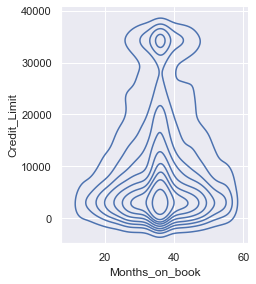

In [78]:
sns.pairplot(bank, x_vars=['Months_on_book'], y_vars= ['Credit_Limit'], height=4, aspect=0.9,kind='kde')

#### Using the correlation table.

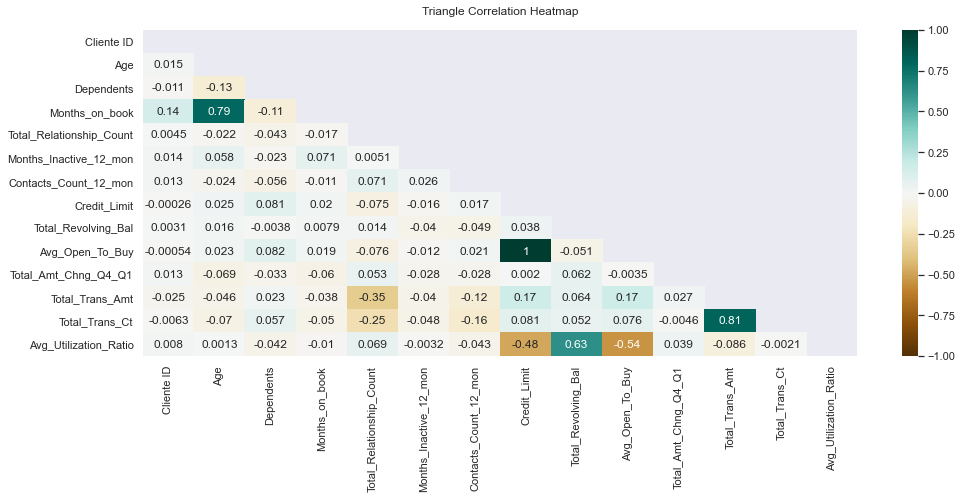

In [79]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(bank.corr(method = "pearson"), dtype=np.bool))
heatmap = sns.heatmap(bank.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=15);

 https://www.kite.com/python/answers/how-to-find-the-correlation-between-two-pandas-dataframe-columns-in-python 

In [80]:
Months_on_book = bank["Months_on_book"]
Credit_Limit = bank["Credit_Limit"]
correlation = Months_on_book.corr(Credit_Limit)

In [81]:
print('The correlation between variables is {:.2f}'.format(correlation))

The correlation between variables is 0.02


<AxesSubplot:xlabel='Months_on_book'>

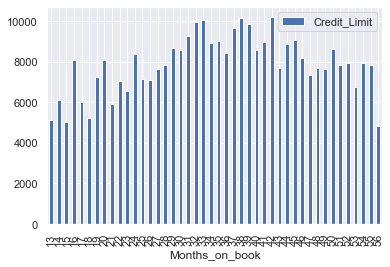

In [82]:
bank.groupby('Months_on_book').mean().plot(y='Credit_Limit', kind='bar')

# Third section (30 marks)

Pick two variables (different to the ones in question 1) and build a linear regression model that allows you 
to predict information about those variables. Interpret your results, and provide a short explanation and 
conclusion based on your findings.
Report (10 marks)
All your answers should be in form of a formal report in a PDF file. 

According to the pairplot shown in the EDA section, we can see that some variables have linear projections such as "average_to_buy" and "Credit_Limit" but seeking to analyze other variables, and we can highlight that according to a quick survey, credit card spending has increased in recent years. With that, I decided to investigate the linear relation of the variable that brings us the total spent and the amount of spent operations of each client, and they are: "Total_Trans_Ct" and "Total Transaction Count." Remember that these variables' data are accounted for in the last 12 months).

In [83]:
bank

Cliente ID           Customer  Age Gender  Dependents    Education  \
0       768805383  Existing Customer   45      M           3  High School   
1       818770008  Existing Customer   49      F           5     Graduate   
2       713982108  Existing Customer   51      M           3     Graduate   
4       709106358  Existing Customer   40      M           3   Uneducated   
5       713061558  Existing Customer   44      M           2     Graduate   
...           ...                ...  ...    ...         ...          ...   
10120   710841183  Existing Customer   54      M           1  High School   
10121   713899383  Existing Customer   56      F           1     Graduate   
10122   772366833  Existing Customer   50      M           2     Graduate   
10124   716506083  Attrited Customer   44      F           1  High School   
10126   714337233  Attrited Customer   43      F           2     Graduate   

        Status Income_Category Card_Category  Months_on_book  \
0      Married    above medium          Blue              39   
1       Single             low          Blue              44   
2      Married            high          Blue              36   
4      Married    above medium          Blue              21   
5      Married          medium          Blue              36   
...        ...             ...           ...             ...   
10120   Single    above medium          Blue              34   
10121   Single             low          Blue              50   
10122   Single          medium          Blue              40   
10124  Married             low          Blue              36   
10126  Married             low        Silver              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
4                             5                       1   
5                             3                       1   
...                         ...                     ...   
10120                         5                       2   
10121                         4                       1   
10122                         3                       2   
10124                         5                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
4                          0        4716.0                    0   
5                          2        4010.0                 1247   
...                      ...           ...                  ...   
10120                      0       13940.0                 2109   
10121                      4        3688.0                  606   
10122                      3        4003.0                 1851   
10124                      4        5409.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
4               4716.0                 2.175              816              28   
5               2763.0                 1.376             1088              24   
...                ...                   ...              ...             ...   
10120          11831.0                 0.660            15577             114   
10121           3082.0                 0.570            14596             120   
10122           2152.0                 0.703            15476         

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Total_Trans_Ct'>

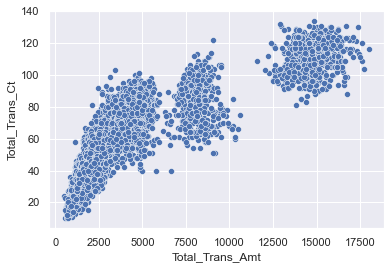

In [85]:
sns.scatterplot(data=bank, x="Total_Trans_Amt", y="Total_Trans_Ct")

In [86]:
import numpy as np

# best fit polynomials

# polynomial - meals
bk_fit = np.polyfit(bank.Total_Trans_Amt, bank.Total_Trans_Ct, 1)

bk_fit

array([5.56076667e-03, 4.00676428e+01])

* Amount: A
* Count: C

Lineal Regression Model: **A = 5.56*C - 4.00**

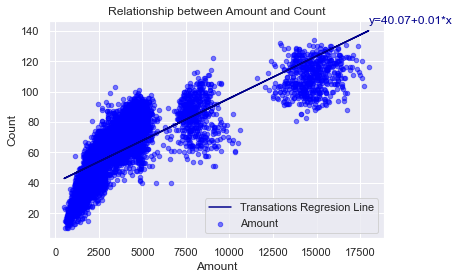

In [87]:
# scatter plots and regression lines

# Scatter plots.
ax1 = bank.plot(kind='scatter', x='Total_Trans_Amt', y='Total_Trans_Ct', color='blue', alpha=0.5)

# regression lines
plt.plot(bank.Total_Trans_Amt, bk_fit[0] * bank.Total_Trans_Amt + bk_fit[1], color='darkblue')

# regression equations
plt.text(18000, 145,'y={:.2f}+{:.2f}*x'.format( bk_fit[1], bk_fit[0]), color='darkblue')

# legend, title and labels.
plt.legend(labels=['Transations Regresion Line', 'Amount', 'Count'])
plt.title('Relationship between Amount and Count')
plt.xlabel('Amount')
plt.ylabel('Count');

#### Prediction using Numpy

In [88]:
# predictions using numpy
print(np.polyval(bk_fit, [230]))


[41.34661912]


In [89]:
from sklearn.metrics import r2_score 

actual_tips = bank.Total_Trans_Amt
predicted_tips = bank.Total_Trans_Ct
R_square = r2_score(actual_tips,predicted_tips) 
print('Coefficient of Determination', R_square)

Coefficient of Determination -1.547481989801442
